## 📚 Bibliotecas


In [906]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## 📌 Extração

In [907]:
# URL da API que retorna os dados em JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
dados_json = response.json()

# Criar um DataFrame a partir dos dados JSON
df = pd.DataFrame(dados_json)

# Exibir as primeiras linhas para conferir
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🔧Transformação

In [908]:
# 1. Mostrar as colunas do dataset
print("Colunas do dataset:")
print(df.columns)

# 2. Verificar os tipos de dados de cada coluna
print("\nTipos de dados das colunas:")
print(df.dtypes)




Colunas do dataset:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Tipos de dados das colunas:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [910]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [911]:
# Normalização dos dados
df = pd.json_normalize(dados_json)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [912]:
# Removendo a coluna de identificação
df = df.drop(columns=['customerID'], axis=1)
#dados_tratados = dados_tratados.drop(columns=['customer_id', 'contas_diarias'], axis=1)
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [913]:
colunas = list(df.columns)
colunas

['Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [914]:
df = df.explode(colunas[1:])
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [915]:
for col in df.columns:
  print(f"valores unico'{col}': {df[col].nunique()}")
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

valores unico'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores unico'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores unico'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores unico'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores unico'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores unico'customer.tenure': 73
valores unico'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores unico'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores unico'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores unico'internet.OnlineSecurity': 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
v

In [916]:
print("Numero de duplicados", df.duplicated().sum())
print("Numero de Nulos", df.isnull().sum())

Numero de duplicados 22
Numero de Nulos Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [917]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


In [918]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [919]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   object 
 1

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

Tratando dados numérico

In [920]:
# Substituições comuns para conversão binária
substituir_binario = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0,
    'Sim': 1,
    'Não': 0
}

# Aplicar substituições em todas as colunas do tipo objeto (strings)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace(substituir_binario)


/tmp/ipython-input-1591102198.py:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [921]:
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   int64  
 4   customer.Dependents        7267 non-null   int64  
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   int64  
 7   phone.MultipleLines        7267 non-null   int64  
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   int64  
 10  internet.OnlineBackup      7267 non-null   int64  
 11  internet.DeviceProtection  7267 non-null   int64  
 12  internet.TechSupport       7267 non-null   int64  
 13  internet.StreamingTV       7267 non-null   int64  
 1

In [923]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
df['Contas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())


   account.Charges.Monthly  Contas_Diarias
0                     65.6            2.19
1                     59.9            2.00
2                     73.9            2.46
3                     98.0            3.27
4                     83.9            2.80


## 📊 Análise Descritiva dos Dados

In [924]:
df.rename(columns={
    'customerID' : 'ID_Cliente',
    'Churn':'Evasao',
    'customer.gender': 'Genêro',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner':'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService':'servico_de_internet',
    'internet.OnlineSecurity':'antivirus',
    'internet.OnlineBackup':'backup',
    'internet.DeviceProtection':'protecao__de_dipositivo',
    'internet.TechSupport':'suporte_tecnico',
    'internet.StreamingTV':'streaming_tv',
    'internet.StreamingMovies':'streaming_filmes',
    'account.Contract':'tipo_contrato',
    'account.PaperlessBilling':'fatura_digital',
    'account.PaymentMethod':'metodo_pagamento',
    'account.Charges.Monthly':'total_mensal',
    'account.Charges.Total':'gasto_total'
}, inplace=True)
df.head()

,Evasao,Genêro,Idoso,Parceiro,Dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_de_internet,antivirus,...,protecao__de_dipositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,total_mensal,gasto_total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


# Média das variáveis numéricas por Churn

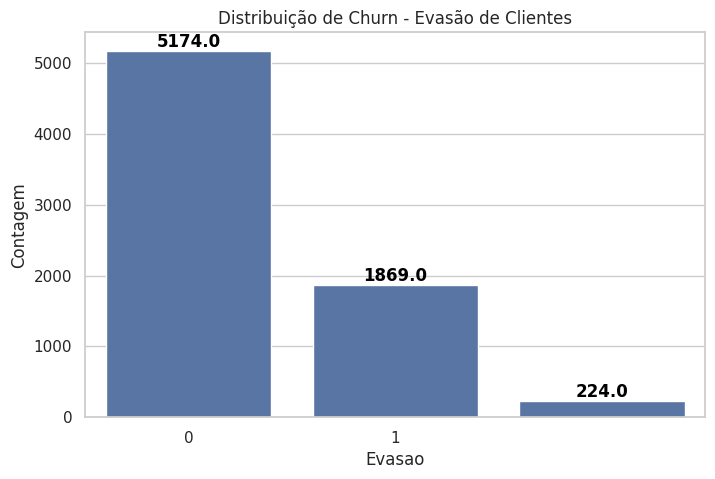

In [925]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["Evasao"])

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title("Distribuição de Churn - Evasão de Clientes")
plt.xlabel("Evasao")
plt.ylabel("Contagem")
plt.show()

In [926]:
df.describe()

,Idoso,Parceiro,Dependentes,meses_contrato,servico_telefone,multiplas_linhas,antivirus,backup,protecao__de_dipositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,total_mensal,gasto_total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [927]:
import plotly.express as px
px.box(df, x = 'Evasao', y = 'total_mensal', color = 'Evasao')

In [928]:
px.histogram(df, x = 'servico_telefone',  text_auto = True, color = 'Evasao', barmode = 'group')

## 📄Relatorio Final

Relatório Final
1. Introdução
Este estudo teve como objetivo analisar os padrões de evasão (churn) dos clientes da TelecomX, visando identificar fatores que contribuem para a saída de clientes e propor estratégias de retenção.

2. Limpeza e Tratamento de Dados
Importação dos dados via API JSON
Normalização das colunas aninhadas (customer, phone, internet, account)
Remoção de duplicatas
Conversão apropriada dos tipos de dados
Criação da coluna de custos diários
3. Análise Exploratória
3.1 Visão Geral
Taxa de Evasão: 25.72% dos clientes cancelaram o serviço
Taxa de Retenção: 71.20% permaneceram como clientes
3.2 Perfil dos Clientes
Tempo médio de permanência: 32.3 meses
Valor médio da conta mensal: R$ 64.72
16.3% são clientes idosos
3.3 Distribuição de Serviços
Internet:

Fibra Ótica: 44.0%
DSL: 34.2%
Sem Internet: 21.8%
Contratos:

Mensal: 55.1%
Dois Anos: 24.0%
Um Ano: 20.9%
4. Conclusões e Insights
A taxa de evasão de 25.72% é considerada alta para o setor
Mais da metade dos clientes (55.1%) opta por contratos mensais
Fibra ótica é o serviço de internet mais popular
O tempo médio de permanência indica base de clientes relativamente estável
5. Recomendações
Incentivo a Contratos Longos: Desenvolver programas de fidelidade para migração de contratos mensais para anuais
Foco em Retenção: Criar estratégias específicas para clientes nos primeiros 32 meses
Segmentação por Idade: Desenvolver pacotes específicos para o público idoso
Qualidade do Serviço: Priorizar a manutenção da qualidade da fibra ótica
Precificação Estratégica: Avaliar a política de preços considerando o ticket médio de R$ 64.72
6. Próximos Passos
Implementar sistema de alerta precoce para clientes com alto risco de evasão
Desenvolver modelos preditivos de churn
Realizar pesquisas qualitativas com clientes que cancelaram o serviço